In [9]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/d6/9e/8afc618cfed4b5dc602b11754d4d9193a268439704defae301bffca7f04c/spacy-3.6.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/91.9 kB ? eta -:--:--
     ---------------------------------------- 91.9/91.9 kB 5.4 MB/s eta 0:00:00
  Obtaining dependency information for thinc<8.2.0,>=8.1.8 from https://files.pythonhosted.org/packages/ea/65/9fe6fe1ddb5fd34b7b81dada121e6862791e624384a2964331d0228aea38/thinc-8.1.12-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for wasabi<1.2.0,>=0.9.1 from https://files.pythonhosted.org/packages/8f/69/26cbf0bad11703241cb84d5324d868097f7a8faf2f1888354dac8883f3fc/wasabi-1.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for srsly<3.0.0,>=2.4.3 from https://files.pythonhosted.org/packages/c6/05/d8cf64f4595080ef4b011359a9

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
import numpy as np
import os
import pandas as pd
import glob

import time
import re
from nltk.tokenize import sent_tokenize,word_tokenize

import string
from nltk.corpus import stopwords
import spacy

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Road_Map of the task

# first extract the data from pdf images
# create the labled data set using collecting the data

# Collecting the data

# Using normal pdfreader

In [ ]:
import pandas as pd
import PyPDF2
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
2370+8005+5974

In [ ]:
file_path = r"D:\Data Science(Ekeeda)\Projects\document_classsification\fwpurchaseinvoice\J190027389.pdf"


with open(file_path, "rb") as file:
    data = PyPDF2.PdfReader(file)
    page = data.pages[2]
    text = page.extract_text()
    print(len(text))

In [ ]:
# for filename in os.listdir(path):
#         file_path = os.path.join(path, filename)
#         if filename.endswith('.pdf'):
#             print(filename)
#             with open(file_path, "rb") as file:
#                 pdf_reader = PyPDF2.PdfReader(file)
#                 pdf_text = "" 
#                 for i in range(len(pdf_reader.pages)):
#                     print(i)

In [ ]:
def pdf_to_data(path, label):
    pdf_text_list = [] 

    for filename in os.listdir(path):
        file_path = os.path.join(path, filename)
        if filename.endswith('.pdf'):
            with open(file_path, "rb") as file:
                pdf_reader = PyPDF2.PdfReader(file)
                pdf_text = "" 
                for page in pdf_reader.pages:
                    pdf_text += page.extract_text()
                pdf_text_list.append(pdf_text)
    
    data = pd.DataFrame(pdf_text_list, columns=['Text'])
    data['Label'] = label

    return data

In [ ]:
# path = r"D:\Data Science(Ekeeda)\Projects\document_classsification\fwpurchaseinvoice"

# purchase_invoice_data = pdf_to_data(path,1)

In [ ]:
# purchase_invoice_data

In [ ]:
sales_invoice_data = pdf_to_data(r"D:\Data Science(Ekeeda)\Projects\document_classsification\fwsalesinvoice",0)

In [ ]:
sales_invoice_data

In [ ]:
# invoice_data = pd.concat([sales_invoice_data,purchase_invoice_data],ignore_index=True)

In [ ]:
invoice_data.shape

In [ ]:
invoice_data

In [ ]:
invoice_data.to_csv('Invoce_Data.csv')

# Using computer vision 

In [11]:
poppler_path = r"D:\programing software\Release-23.07.0-0\poppler-23.07.0\Library\bin"

pdf_path = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Purchase_invoice\purchasebill (1)\C240176401.pdf"

In [ ]:
img = convert_from_path(pdf_path,poppler_path=poppler_path)

In [ ]:
folder_path ="D:\Data Science(Ekeeda)\Projects\document_classsification\Purchase_invoice"

In [ ]:
# big = []
# for filename in os.listdir(folder_path):
#     InFolder_path = os.path.join(folder_path, filename)
#     print(InFolder_path)
#     for 

In [6]:
def Data_collector(folder_path):
    text_data = []
    poppler_path = r"D:\programing software\Release-23.07.0-0\poppler-23.07.0\Library\bin"
    
    for filename in os.listdir(folder_path):
        pdf_path = os.path.join(folder_path, filename)
        
        if filename.endswith('.pdf') or filename.endswith('.PDF'):
            img = convert_from_path(pdf_path,poppler_path=poppler_path)  
            
            pdf_text = ""
            for page_num, image in enumerate(img):
                opencv_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
                text = pytesseract.image_to_string(opencv_image,lang='eng')
                pdf_text += text
            text_data.append(text)
            
#     data = pd.DataFrame(text_data, columns=['Text'])
#     data['Label'] = label
    return text_data

In [12]:
import os
from pdf2image import convert_from_path
import pytesseract
import cv2
import numpy as np
from nltk.tokenize import word_tokenize

def Data_collector(folder_path):
    text_data = []
    t_values = []
    poppler_path = r"D:\programing software\Release-23.07.0-0\poppler-23.07.0\Library\bin"
    
    for pdf_number, filename in enumerate(os.listdir(folder_path), start=1):
        pdf_path = os.path.join(folder_path, filename)
        
        if filename.endswith('.pdf') or filename.endswith('.PDF'):
            img = convert_from_path(pdf_path, poppler_path=poppler_path)  
            
            text = ""
            for page_num, image in enumerate(img):
                opencv_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
                text_ = pytesseract.image_to_string(opencv_image, lang='eng')
                text += text_
                
                b = text[text.find('Consignee (Ship to)'):text.find('Consignee (Ship to)')+80]
                c = word_tokenize(b)
                t = ""
                for i in c[5:9]:
                    t += i
            
            pdf_header = f"pdf{pdf_number}\n\n"
            pdf_text_with_header = f"{pdf_header}\n{text}"
            text_data.append(pdf_text_with_header)
            t_values.append(t)
    
    return text_data,t_values


In [13]:
folder_path = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Sales_invoice\fwsalesinvoice"
extracted_texts,buyer = Data_collector(folder_path)

In [16]:
print(extracted_texts)

['pdf1\n\n\nTax Invoice\n\nIRN : 54bb0147c70619b645ee1425d3b44f2f767c0921b1 5f-\nd6d1908f2c307311f3f7\n\nAck No. : 172313024063204\n\nAck Date : 30-Jun-23\n\ne-Invoice\n\nB M Infotrade Private Limited\n\n53 A, Vishnupuri. Dalda Factory Road,\nDurgapura, Jaipur\nUDYAM-RJ-17-0010127\n\nGSTIN/UIN: O8AAECB8518R12ZZ\nState Name: Rajasthan, Code : 08\nCIN: US52190RJ2012PTC037624\nContact : 9829189200, 9314508367\nE-Mail : beena@bmtraders.com\nhttps://bminfotrade.com\n\nConsignee (Ship to)\nAavas Financiers Ltd\n201-202, 2nd Floor, Southend Square, Jaipur,\n\nGSTIN/UIN : OBAAJCA2237M1ZH\nState Name : Rajasthan, Code : 08\nContact : 9116619026\n\nInvoice No. Dated\n\nBM/23-24/5626 30-Jun-23\n\nDelivery Note Mode/Terms of Payment\n30 Days\n\nReference No. & Date. Other References\n\nBuyer\'s Order No. Dated\n\nAAVASIIT/23-24/993 28-Jun-23\n\nDispatch Doc No.\n\nDelivery Note Date\n\nDispatched through\n\nDestination\n\nVessel/Flight No.\n\nBuyer (Bill to)\n\nAavas Financiers Ltd\n201-202, 2nd F

In [ ]:
p1 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Purchase_invoice\fwpurchaseinvoice"
p2 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Purchase_invoice\purchasebill"
p3 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Purchase_invoice\purchasebill (1)"
p4 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Purchase_invoice\purchasebill (2)"
p5 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Purchase_invoice\purchaseinvoice"
p6 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Purchase_invoice\purchaseinvoice (1)"
p7 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Purchase_invoice\purchaseinvoice (2)"
p8 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Purchase_invoice\purchaseinvoice (3)"
p9 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Purchase_invoice\purchaseinvoice (4)"
p10 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Purchase_invoice\purchaseinvoice(0)"



P1 = Data_collector(p1,"Purchase")
P2 = Data_collector(p2,"Purchase")
P3 = Data_collector(p3,"Purchase")
P4 = Data_collector(p4,"Purchase")
P5 = Data_collector(p5,"Purchase")
P6 = Data_collector(p6,"Purchase")
P7 = Data_collector(p7,"Purchase")
P8 = Data_collector(p8,"Purchase")
P9 = Data_collector(p9,"Purchase")
P10 = Data_collector(p10,"Purchase")




In [ ]:
s1 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Sales_invoice\fwsalesinvoice"
s2 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Sales_invoice\salesbill1"
s3 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Sales_invoice\salesbill2"
s4 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Sales_invoice\salesbill3"
s5 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Sales_invoice\salesbill4"
s6 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Sales_invoice\salesbill5"
s7 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Sales_invoice\salesbill6"
s8 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Sales_invoice\salesbill7"
s9 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Sales_invoice\salesbill8"
s10 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Sales_invoice\salesbill9"
s11 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Sales_invoice\salesinvoice"
s12 = r"D:\Data Science(Ekeeda)\Projects\document_classsification\Sales_invoice\salesinvoice (1)"


S1 = Data_collector(s1,"Sales")
S2 = Data_collector(s2,"Sales")
S3 = Data_collector(s3,"Sales")
S4 = Data_collector(s4,"Sales")
S5 = Data_collector(s5,"Sales")
S6 = Data_collector(s6,"Sales")
S7 = Data_collector(s7,"Sales")
S8 = Data_collector(s8,"Sales")
S9 = Data_collector(s9,"Sales")
S10 = Data_collector(s10,"Sales")
S11 = Data_collector(s11,"Sales")
S12 = Data_collector(s12,"Sales")

In [ ]:
data = [P1, S1, P2, S2, P3, S3,P4,S4,P5,S5,P6,S6,P7,S7,P8,S8,P9,S9,P10,S10,S11,S12]

In [ ]:
Invoice_data = pd.concat(data, ignore_index=True)

In [2]:
Invoice_data = pd.read_csv('Invoice_data.csv')

In [3]:
Invoice_data.drop(["Unnamed: 0"],axis=1,inplace=True)

Invoice_data.head(6)

,Text,Label
0,Tax Invoice\n\nPBR NETWORKING SOLUTION\nPLOT N...,Purchase
1,Tax Invoice cum Delivery Challan\n\n(Original)...,Purchase
2,GST TAX INVOICE\n\nAadhar Electronics\n\n69/57...,Purchase
3,Print\n\nfed on 23-Jun-23 at 13:41\n\nDeclarat...,Purchase
4,Tax Invoice\n\nCompany's PAN : ANPPS7094C\n\nD...,Purchase
5,Page: 3 of 3\n\nRedington\n\nInvoice no: J1900...,Purchase


In [4]:
Invoice_data.shape

(665, 2)

In [5]:
# Invoice_data.to_csv('Invoice_data.csv')

# Create copy of the data

In [6]:
df = Invoice_data.copy()

# Data Cleaning

In [7]:
df.isna().sum()

Text     0
Label    0
dtype: int64

In [8]:
df.duplicated().sum()

38

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
def remove_space(text):
    return text.replace('\n\n', ' ').replace('\n', ' ')

In [12]:
df['Text'] = df['Text'].apply(remove_space)

# EDA

In [13]:
df['Label'].value_counts()

Sales       416
Purchase    211
Name: Label, dtype: int64

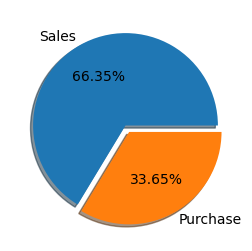

In [14]:
plt.figure(figsize=(3,3))
plt.pie(df['Label'].value_counts(),labels = ['Sales','Purchase'],autopct="%0.2f%%",explode=[0,0.08],shadow=True)
plt.show()

# Data preprocpreprocessing 

In [15]:
nlp = spacy.load("en_core_web_sm")

In [16]:
def Preprocessing_data(text):
    text = text.replace('\n\n', ' ').replace('\n', '')
    
    text = re.sub(r'Page: \d+ of \d+|e-Way Bill|IRN : [a-f0-9]+', '', text)
    
    sc_except_at = ''.join(c for c in string.punctuation if c != '@')
    
    text = text.translate(str.maketrans('', '', sc_except_at))
    
    text = re.sub(r'\d+', '', text)
    
    text = text.lower()
    
    doc = nlp(text)
    words = [token.text for token in doc]
    
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    
    filtered_text = [word for word in words if word not in stop_words]
    
    return " ".join(filtered_text)

In [17]:
df['Cleaned_text'] = df['Text'].apply(Preprocessing_data)

In [18]:
df.head()

,Text,Label,Cleaned_text
0,Tax Invoice PBR NETWORKING SOLUTION PLOT NO. 5...,Purchase,tax invoice pbr networking solution plot kanti...
1,Tax Invoice cum Delivery Challan (Original) . ...,Purchase,tax invoice cum delivery challan original i...
2,"GST TAX INVOICE Aadhar Electronics 69/57, V.T....",Purchase,gst tax invoice aadhar electronics vt road m...
3,Print fed on 23-Jun-23 at 13:41 Declaration We...,Purchase,print fed jun declaration declare invoice sh...
4,Tax Invoice Company's PAN : ANPPS7094C Declara...,Purchase,tax invoice companys pan anppsc declaration ...


In [19]:
# df.to_csv('Clean_data.csv')

In [20]:
len_words = []
for i in df['Cleaned_text']:
    len_words.append(len(i))
    
print(min(len_words))

241


In [21]:
X = df[['Cleaned_text']]
Y = df['Label']

In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
df['Words'] = df['Cleaned_text'].apply(lambda text: word_tokenize(text))

In [47]:
a = df['Cleaned_text'].apply(lambda text: "".join([token.text for token in nlp(text)]))

In [48]:
a.value_counts()

  sellershallresponsiblewrongmisrepresentationbuyerrespectcloudservicestotalcumulativeliabilitysellerbuyercustomerspartycircumstancesshallexceedparticularinvoicegivingriseclaimsellershallliabledirectindirectspecialconsequentialdamagesadvisedpossibilitiesearliersignedrameshnatarajandate   istlocationchennai                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
cv = CountVectorizer(max_features=400)

In [ ]:
X = cv.fit_transform(X).toarray()

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,random_state=121,stratify=Y,test_size=.1)

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42,class_weight='balanced')
svm_classifier.fit(train_x,train_y)

In [ ]:
pred = svm_classifier.predict(test_x)

In [ ]:
print(classification_report(test_y,pred))

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_classifier.fit(train_x, train_y)

In [ ]:
rf_pred = rf_classifier.predict(test_x)

In [ ]:
print(classification_report(test_y,rf_pred))

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
RF_pipeline = Pipeline([
    ('Step_1', CountVectorizer(max_features=1000)),  # You can adjust the max_features as needed
    ('Step_2', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

In [ ]:
RF_pipeline.fit(train_x,train_y)

In [ ]:
print(classification_report(test_y,RF_pipeline.predict(test_x)))